In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the cleaned Data

In [7]:
clean_df = pd.read_csv("../Data/Processed Data/clean_df.csv")

In [8]:
clean_df.head()

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2023-01-01,Cleveland Police,-1.212283,54.506084,On or near Bromley Lane,E01027626,Hambleton 002D,Other theft,Investigation complete; no suspect identified
1,2023-01-01,Cleveland Police,-1.235660,54.710526,On or near Dobson Place,E01011954,Hartlepool 001A,Anti-social behaviour,statusUnknown
2,2023-01-01,Cleveland Police,-1.237805,54.711196,On or near King Oswy Shops,E01011954,Hartlepool 001A,Anti-social behaviour,statusUnknown
3,2023-01-01,Cleveland Police,-1.236325,54.713146,On or near Lazenby Road,E01011954,Hartlepool 001A,Anti-social behaviour,statusUnknown
4,2023-01-01,Cleveland Police,-1.239865,54.710589,On or near Marshall Close,E01011954,Hartlepool 001A,Burglary,Investigation complete; no suspect identified


In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142284 entries, 0 to 142283
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Month                  142284 non-null  object 
 1   Falls within           142284 non-null  object 
 2   Longitude              142284 non-null  float64
 3   Latitude               142284 non-null  float64
 4   Location               142284 non-null  object 
 5   LSOA code              142284 non-null  object 
 6   LSOA name              142284 non-null  object 
 7   Crime type             142284 non-null  object 
 8   Last outcome category  142284 non-null  object 
dtypes: float64(2), object(7)
memory usage: 9.8+ MB


In [10]:
# Change "Month" column to datetime datatype
clean_df['Month'] = pd.to_datetime(clean_df['Month'])


# Set the "Month" column as index
clean_df.set_index('Month', inplace=True)

In [14]:
new_df = clean_df['Crime type']
new_df.head()

Month
2023-01-01              Other theft
2023-01-01    Anti-social behaviour
2023-01-01    Anti-social behaviour
2023-01-01    Anti-social behaviour
2023-01-01                 Burglary
Name: Crime type, dtype: object

In [25]:
# Group by the month and sum the occurrences of each crime type
result = clean_df.groupby(pd.Grouper(freq='M'))['Crime type'].count()

# Assign a column name to the result
result = result.rename("Crime Count")

# If you want it to be a DataFrame instead of a Series
result_df = result.reset_index()

# Set the "Month" column as index
result_df.set_index('Month', inplace=True)

# Display the result
print(result_df)

            Crime Count
Month                  
2023-01-31         7663
2023-02-28         8069
2023-03-31         8726
2023-04-30         8707
2023-05-31         8764
2023-06-30         8719
2023-07-31         8556
2023-08-31         8299
2023-09-30         8091
2023-10-31         8148
2023-11-30         6844
2023-12-31         6523
2024-01-31         6561
2024-02-29         6641
2024-03-31         7690
2024-04-30         7921
2024-05-31         8556
2024-06-30         7806


In [26]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2023-01-31 to 2024-06-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Crime Count  18 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


<Figure size 2000x1000 with 0 Axes>

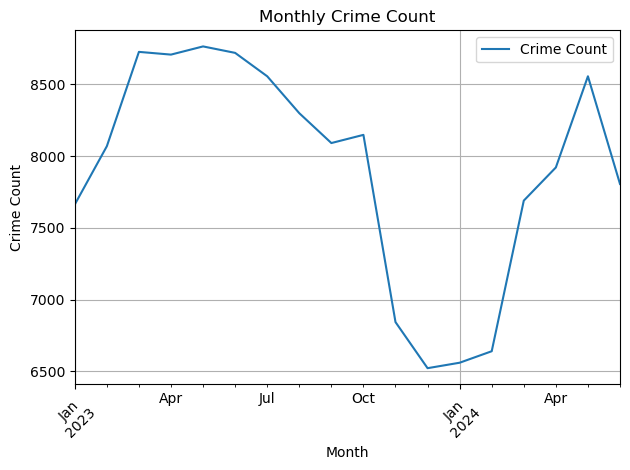

In [29]:

# Plot the data
plt.figure(figsize=(20, 10))
result_df.plot(kind='line')
plt.title('Monthly Crime Count')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()